In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import dataframe_image as dfi

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression , LassoCV , RidgeCV

In [2]:
new_df = pd.read_csv('../datasets/Clean_Train.csv')

In [3]:
new_df

,Lot_Area,Central_Air,SalePrice,Sq_ft,Has_Garage,Large_Lot,Finished_Basement
0,13517,1,130500,2204.0,1,1,1
1,11492,1,220000,3035.0,1,0,1
2,7922,1,109000,2114.0,1,0,1
3,9802,1,174000,1828.0,1,0,0
4,14235,1,138500,2121.0,1,1,0
...,...,...,...,...,...,...,...
2041,11449,1,298751,3612.0,1,0,1
2042,12342,1,82500,1722.0,1,1,1
2043,7558,1,177000,2809.0,1,0,0
2044,10400,1,144000,2400.0,1,0,1


# EDA

We Begin by having a look at the raltionship between our features and our features as a whole

Right away our initial suspicions that Sq_Ft would bare the closest thign to a Linear Realtionship with Sale Price. We found several outliers in both Sq_ft and Lot_Area at this point in the process and removed them from our sample data.

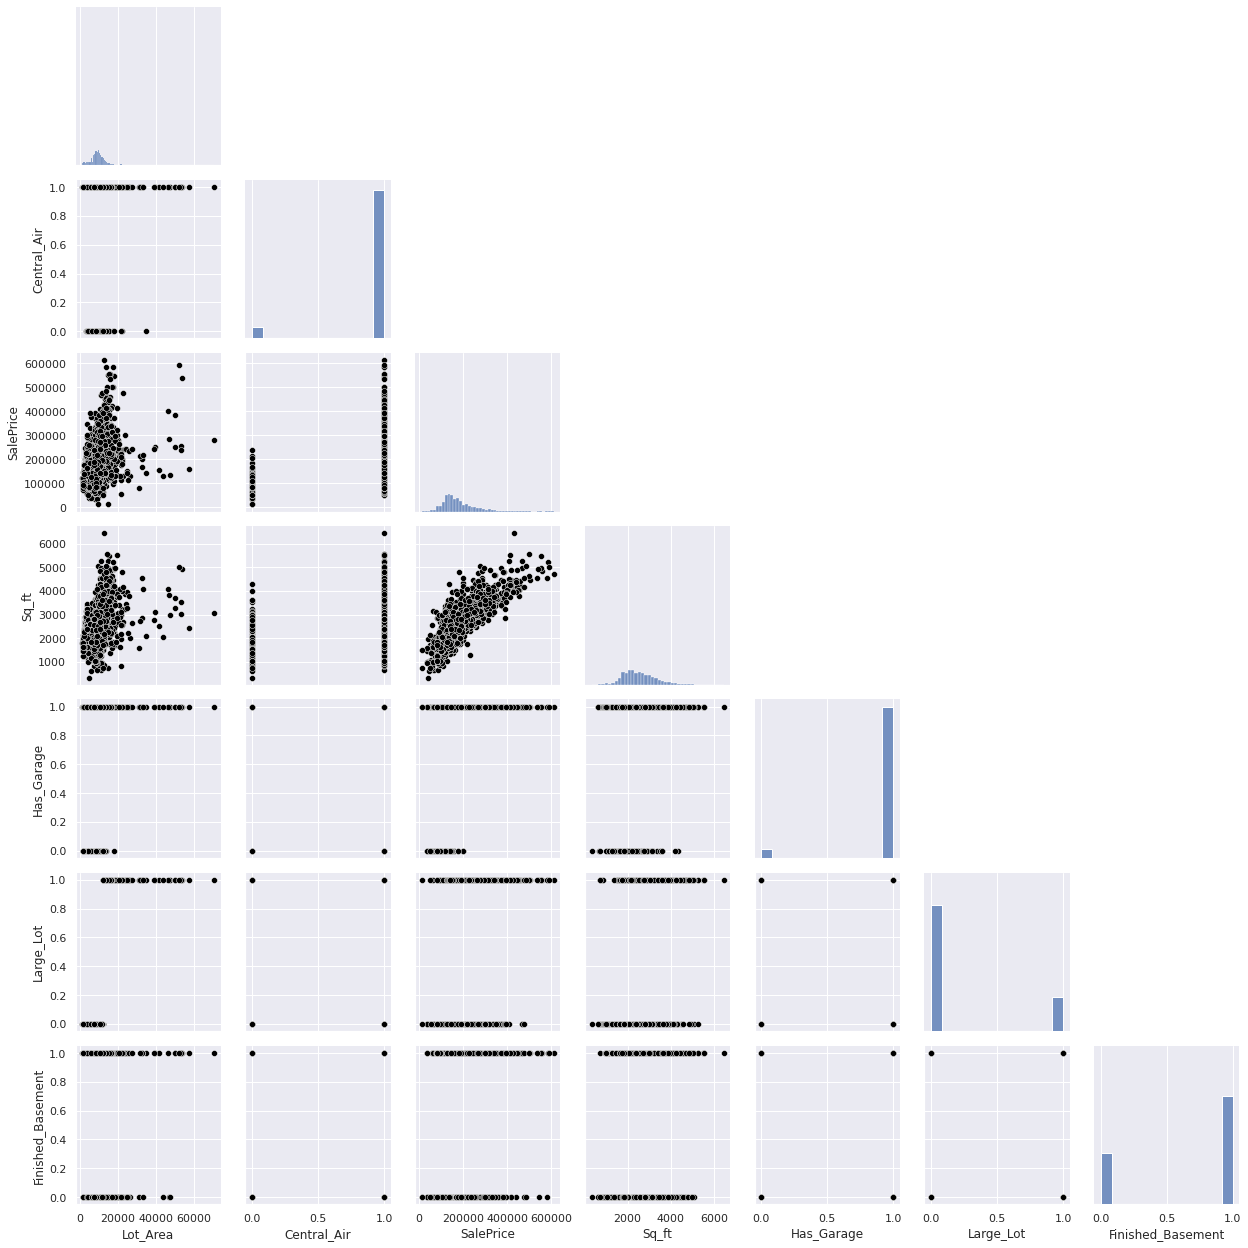

<Figure size 1080x720 with 0 Axes>

In [4]:
sns.set_theme()
sns.pairplot(new_df,  plot_kws={'color':'black'}, corner = True)
plt.tight_layout();plt.figure(figsize = (15,10))
plt.savefig('Pairplot')

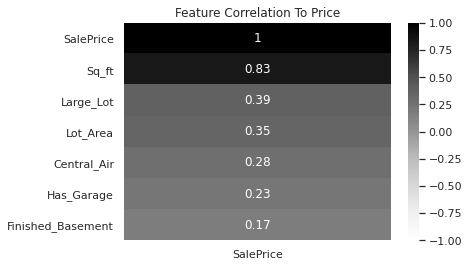

In [5]:
sns.heatmap(new_df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending= False),
           annot = True,
           vmin = -1,
           vmax = 1 ,
           cmap = 'Greys');
plt.title('Feature Correlation To Price')
plt.savefig('Heatmap.png')

### Considered But Rejected 

1) Overal_Cond- reason: not quantitative, no strong correlation 

### Central Air 

Initially it looks as though Houses with Central Air sell for significantly more on Average. 

In [6]:
#AC = new_df.groupby(['Central_Air']).mean()
AC_group = new_df.groupby(['Central_Air']).mean()
AC_group.dfi.export('AC Table.png')

In [7]:
AC_group

,Lot_Area,SalePrice,Sq_ft,Has_Garage,Large_Lot,Finished_Basement
Central_Air,,,,,,
0,8647.163121,100575.078014,1892.964539,0.687943,0.092199,0.340426
1,9995.394226,187407.570604,2591.019948,0.963255,0.221522,0.703937


In [8]:
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols 

In [9]:
ttest_ind( new_df[ new_df['Central_Air'] == 0] ['SalePrice'],
         new_df[ new_df['Central_Air'] == 1] ['SalePrice'])

Ttest_indResult(statistic=-13.06483517240138, pvalue=1.5934972266756352e-37)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

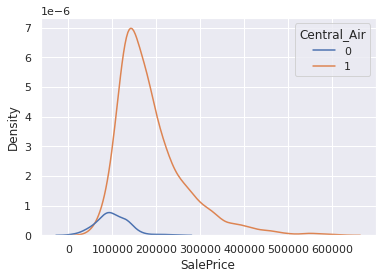

In [10]:
sns.kdeplot(data = new_df, x= 'SalePrice', hue = 'Central_Air')

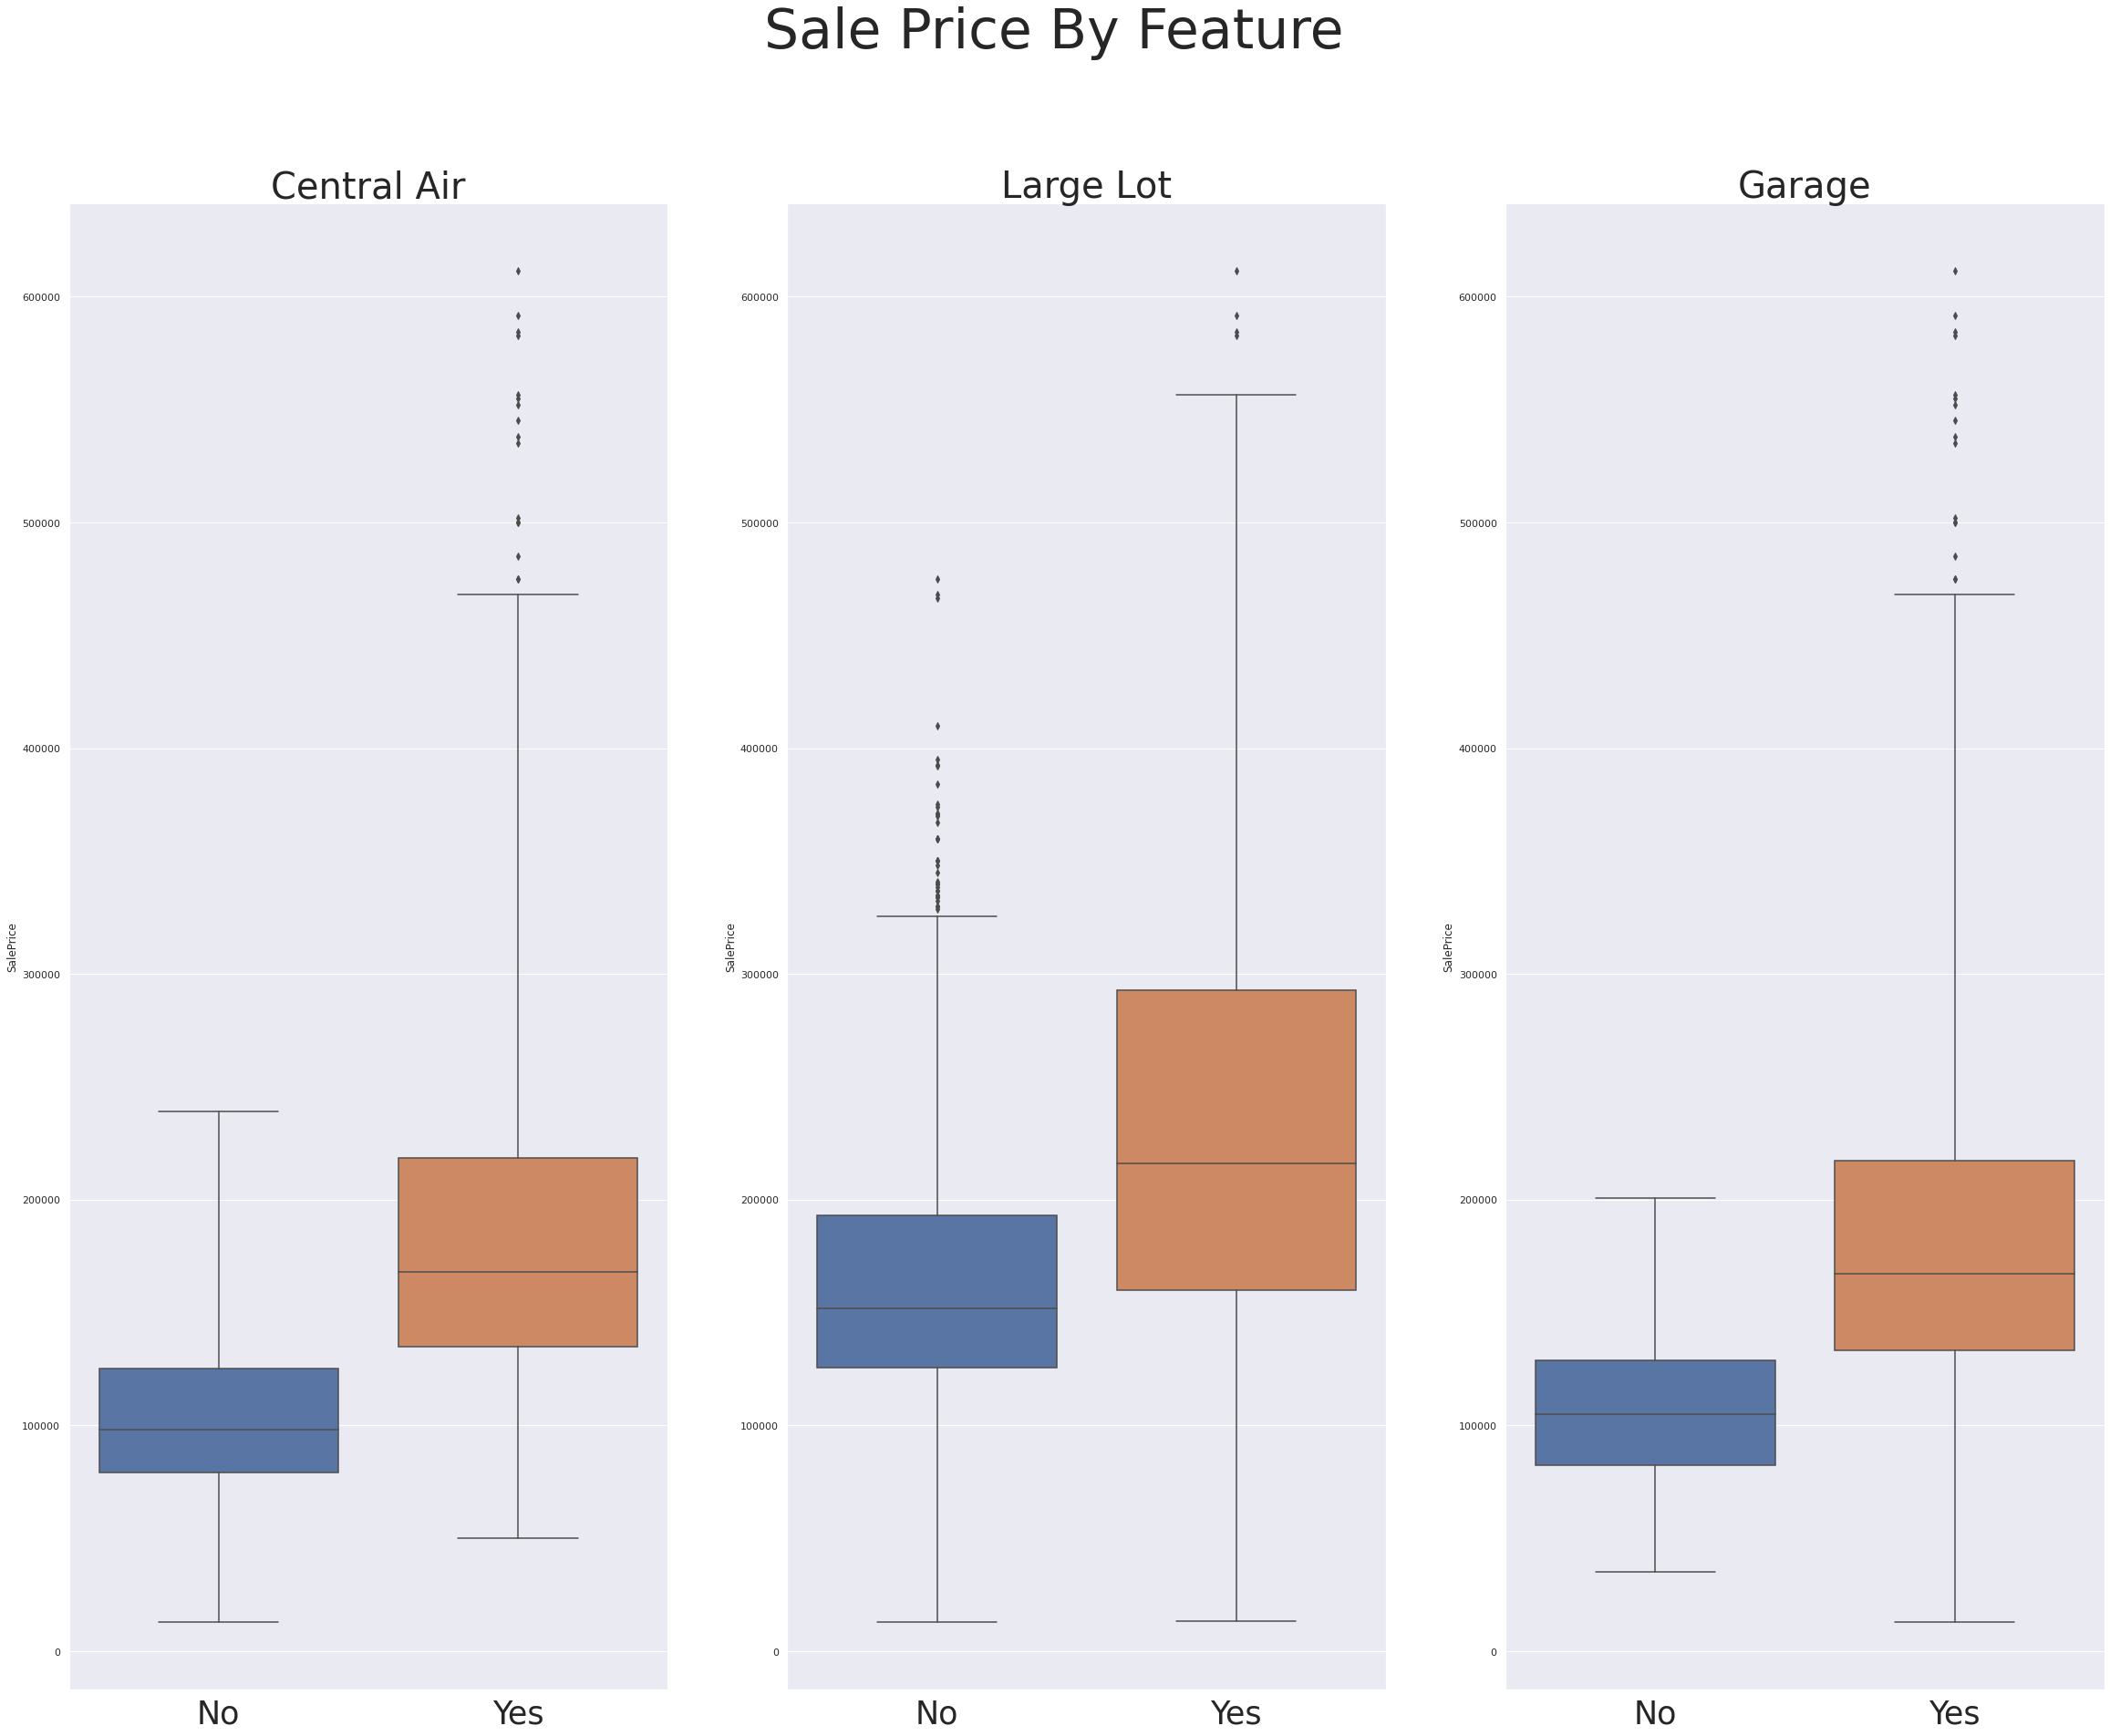

In [70]:
fig , axe = plt.subplots(1,3, figsize = (40,30))
fig.suptitle('Sale Price By Feature', fontsize = 60) 
labels = ['No','Yes']
sns.boxplot(ax = axe[0], data = new_df, x = 'Central_Air',y = 'SalePrice',whis = 3);

axe[0].set_title('Central Air', fontsize = 40)
axe[0].set_xticklabels(labels = labels, fontsize = 35)
axe[0].set_xlabel('')
sns.boxplot(ax= axe[1],x = 'Large_Lot', y = 'SalePrice', data = new_df, whis = 2);
axe[1].set_title('Large Lot', fontsize = 40 )
axe[1].set_xticklabels(labels = labels, fontsize = 35)
axe[1].set_xlabel('')
sns.boxplot(ax = axe[2],x='Has_Garage',y='SalePrice',data=new_df,whis = 3);
axe[2].set_title('Garage', fontsize = 40)
axe[2].set_xticklabels(labels = labels, fontsize = 35)
axe[2].set_xlabel('')
plt.savefig('All_features.jpg')

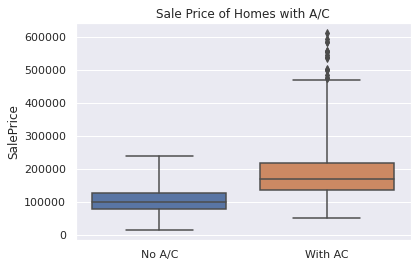

In [54]:
sns.set_theme()
sns.boxplot(data = new_df, x = 'Central_Air',y = 'SalePrice',whis = 3);
plt.title('Sale Price of Homes with A/C')
plt.xticks([0,1],['No A/C', 'With AC'])
plt.xlabel('')
plt.savefig('Central Air.jpg')

The plot above illustrates the difference in house price by whether or not a home has AC. Our TTest gave a promising result that this varaible has influence on our SalePrice.

## Sq_ft

Here we seperate the sample into two groups for those above the mean sq_ft and those below it. Our Ttest again provides strong evidence to support our alternative hypthosesis that this feature has an effect on Sale Price 

In [13]:
ttest_ind( new_df[ new_df['Sq_ft'] < 2_500] ['SalePrice'],
         new_df[ new_df['Sq_ft'] > 2_500] ['SalePrice'])

Ttest_indResult(statistic=-36.71742971205023, pvalue=4.303678584949317e-227)

The result of our Ttest provide evidince to support that Central Air has a statistically significant effect on Sale Price. This difference is illustrated in the plot below.  

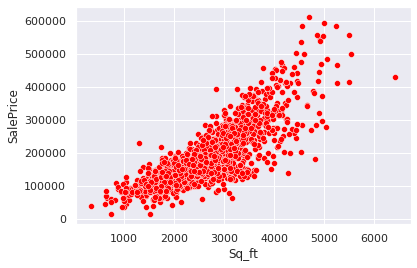

In [14]:
sns.scatterplot(data = new_df, x = 'Sq_ft',y='SalePrice',  color = 'red');
plt.savefig('Price x SqFt')

In [15]:
features = ['Central_Air','Sq_ft']
X = new_df[features]
y = new_df['SalePrice']
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [16]:
cross_val_score(lr,X,y).mean()

0.694367534530218

The plot above shows us that house price and sq feet have a linear relationship.

# Lot Area Sq_ft

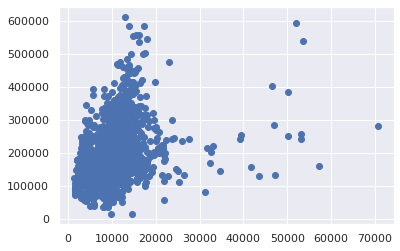

In [17]:
plt.scatter(x = 'Lot_Area',y = 'SalePrice', data = new_df)

## Large_Lot

In [18]:
Large_group = new_df.groupby(['Large_Lot']).mean()
Large_group.dfi.export('LargeLot Table.png')

In [19]:
Large_group

,Lot_Area,Central_Air,SalePrice,Sq_ft,Has_Garage,Finished_Basement
Large_Lot,,,,,,
0,8176.560521,0.920546,165525.296710,2399.452514,0.933582,0.659218
1,16294.337931,0.970115,240301.735632,3074.213793,0.983908,0.751724


In [20]:
ttest_ind( new_df[ new_df['Large_Lot'] == 1] ['SalePrice'],
         new_df[ new_df['Large_Lot'] == 0] ['SalePrice'])

Ttest_indResult(statistic=18.926537251448675, pvalue=9.661244625252744e-74)

We have a P value very close to 0 showing that our engineered feature does have an effect on the sale price.

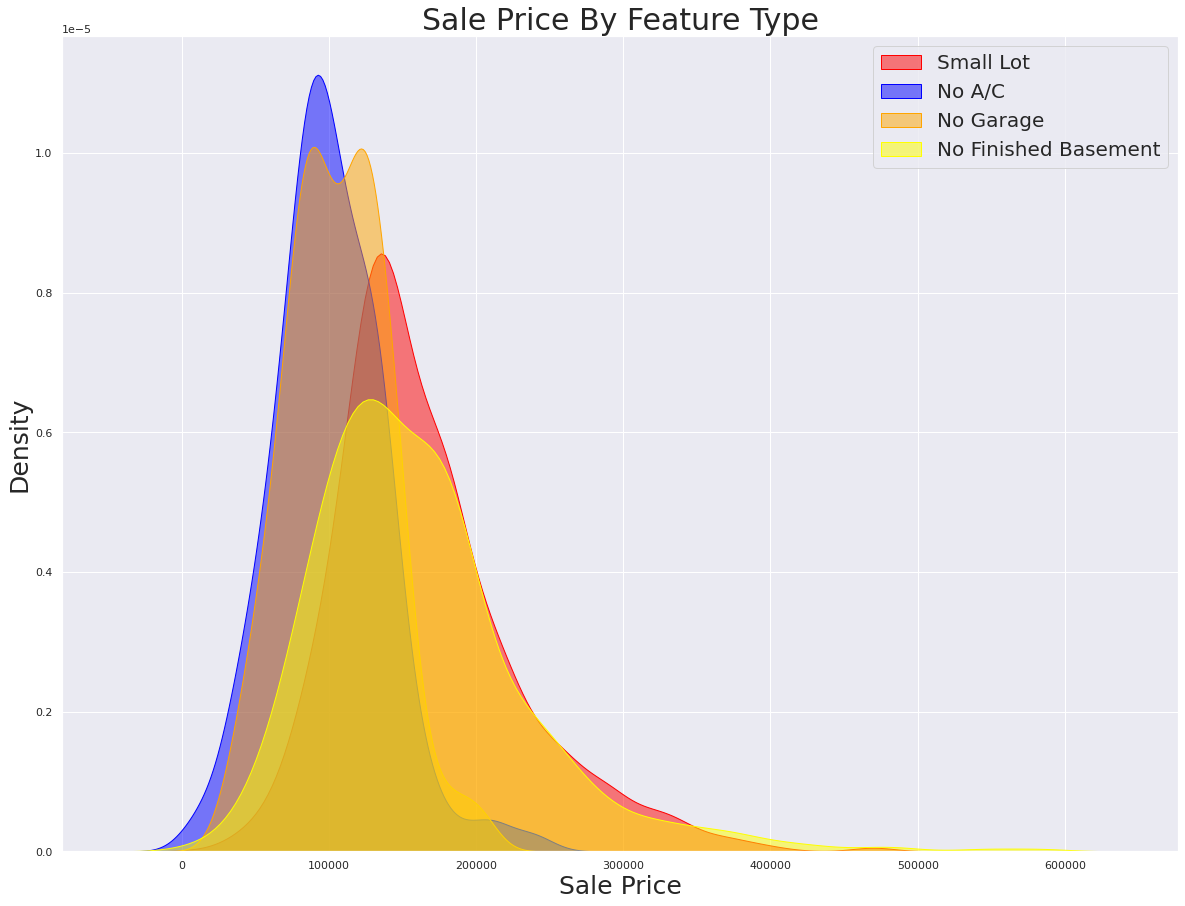

In [59]:
plt.figure(figsize= (20,15))
sns.kdeplot(data = new_df[new_df['Large_Lot']==0], x = 'SalePrice', label = 'Small Lot', color = 'Red', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Central_Air']==0], x = 'SalePrice', label = 'No A/C', color = 'Blue', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Has_Garage']==0], x = 'SalePrice', label = 'No Garage', color = 'Orange', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Finished_Basement']==0], x = 'SalePrice', label = 'No Finished Basement', color = 'yellow', fill = True, alpha = .5)
plt.title('Sale Price By Feature Type', fontsize = 30)
plt.xlabel("Sale Price", fontsize = 25)
plt.ylabel("Density", fontsize = 25)
plt.legend(fontsize = 20)
plt.savefig('No_features_kde.jpg')

In [22]:
ttest_ind( new_df[ new_df['Central_Air'] == 0] ['SalePrice'],
         new_df[ new_df['Has_Garage'] == 0] ['SalePrice'])

Ttest_indResult(statistic=-1.2246082869951382, pvalue=0.22186185695416255)

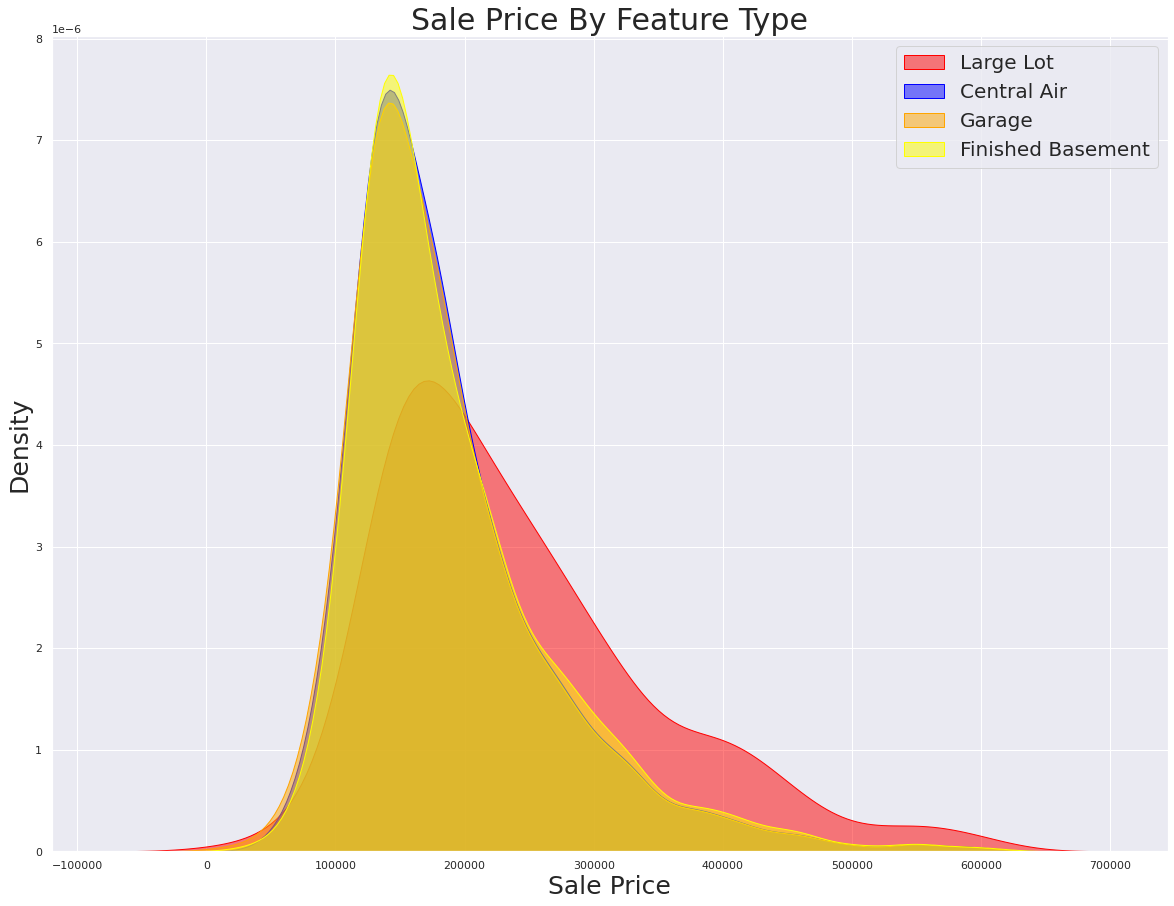

In [58]:
plt.figure(figsize= (20,15))
sns.kdeplot(data = new_df[new_df['Large_Lot']==1], x = 'SalePrice', label = 'Large Lot', color = 'Red', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Central_Air']==1], x = 'SalePrice', label = 'Central Air', color = 'Blue', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Has_Garage']==1], x = 'SalePrice', label = 'Garage', color = 'Orange', fill = True, alpha = .5)
sns.kdeplot(data = new_df[new_df['Finished_Basement']==1], x = 'SalePrice', label = 'Finished Basement', color = 'yellow', fill = True, alpha = .5)
plt.title('Sale Price By Feature Type', fontsize = 30)
plt.xlabel("Sale Price", fontsize = 25)
plt.ylabel("Density", fontsize = 25)
plt.legend(fontsize = 20)
plt.savefig('With_features_kde.jpg')

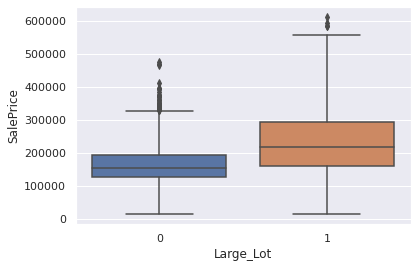

In [24]:
sns.boxplot(x = 'Large_Lot', y = 'SalePrice', data = new_df, whis = 2);
plt.savefig('LargeLot Only.png')

Our Boxplot above shows the relationship between a house being large and it's sale price, our Median Sale Price for Large Homes is more than the top the interquartile range for those houses that are not considered large. 

Below we see the same information but this time categorized once more by whether or not the home has AC. 

Here again we see that the Sale Price of both Large, and normaly sized homes are influenced by whether or not the homne as Central Air. 

This gives us further evidence that AC is a strong factor in Sale Prices

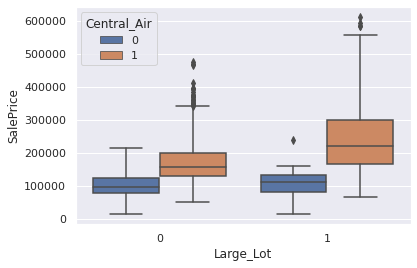

In [25]:
sns.boxplot(x = 'Large_Lot', y = 'SalePrice',hue= 'Central_Air',data = new_df, whis = 2);
plt.savefig('LargL & AC.png')

## Has_Garage

In [ ]:
Garage_group = new_df.groupby(['Has_Garage']).mean()
Garage_group.dfi.export('Garage Table.png')

In [ ]:
ttest_ind( new_df[ new_df['Has_Garage'] == 0] ['SalePrice'],
         new_df[ new_df['Has_Garage'] == 1] ['SalePrice'])

Here again we find the feature we engineered to represent the presence or absence of a Garage to be a strong facotr influencing Sale Prices.

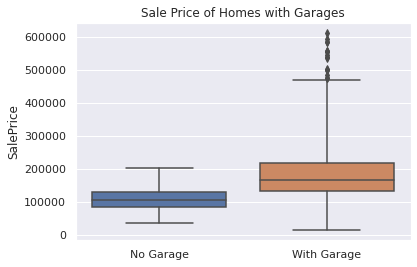

In [53]:
sns.set_theme()
sns.boxplot(data = new_df, x = 'Has_Garage',y = 'SalePrice',whis = 3);
plt.title('Sale Price of Homes with Garages')
plt.xticks([0,1],['No Garage', 'With Garage'])
plt.xlabel('')
plt.savefig('Garage.jpg')

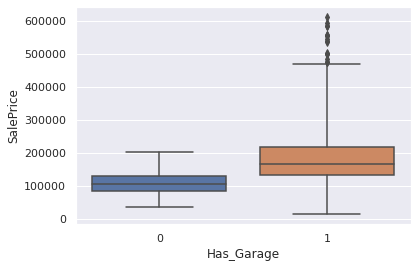

In [36]:
sns.boxplot(x='Has_Garage',y='SalePrice',data=new_df,whis = 3);
plt.savefig('Garage Only.png')

Above we see that the bottom of the lower quartile for those houses with a garage is near the top of the upper quartile for those without. This shows us the magnitude of the effect that having a garage has on our target variable.

Below we have the same information classified once more by whether or not the houses Lot is considered Large. Here we see confirmation that our Lot Area is an independant factor from having a garage.

In [ ]:
sns.boxplot(x='Has_Garage',y='SalePrice',data=new_df, hue = 'Large_Lot', whis = 2.2);
plt.savefig('Garage & LargeL.png')

## Finished Basement

In [ ]:
Basement_group = new_df.groupby(['Finished_Basement']).mean()
Basement_group.dfi.export('Basement Table.png')

In [ ]:
ttest_ind( new_df[ new_df['Finished_Basement']==0]['SalePrice'],
         new_df[ new_df['Finished_Basement']==1]['SalePrice'])

Again we get a P value showing a strong relationship between our target and our feature

In [ ]:
sns.boxplot(x='Finished_Basement',y='SalePrice',data=new_df, whis = 3);
plt.savefig('Basement Only.png')

In [ ]:
sns.boxplot(x='Finished_Basement',y='SalePrice',hue='Central_Air',data=new_df, whis = 3);
plt.savefig('Basement and AC.png')

In [ ]:
sns.boxplot(x='Finished_Basement',y='SalePrice',hue='Large_Lot',data=new_df, whis = 2);
plt.savefig('Basement & LgLot.png')

In [ ]:
sns.boxplot(x='Finished_Basement',y='SalePrice',hue='Has_Garage',data=new_df, whis = 4);
plt.savefig('Basement & Garage.png')

# Conclusion

In [ ]:
new_df.head()

The features selected above have all passed TTest's with flying colors and show independence from one another. We are going to move forward with these features for now.